# 

# GlobalBestPSOの使い方確認

<https://pyswarms.readthedocs.io/en/latest/examples/tutorials/basic_optimization.html>

In [1]:
import numpy as np
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx


%load_ext autoreload
%autoreload 2

## 簡単に最適化をしてみる

In [2]:
# 探索パラメータ
options = {"c1": 0.5, "c2": 0.3, "w": 0.9}

# 最適化インスタンス
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=1, options=options)


# 最適化する関数
def sample_func(x):
    y = 2 * (x[:, 0] - 2) ** 2 + 1
    return y


cost, pos = optimizer.optimize(sample_func, iters=1000)


2023-03-09 06:29:43,033 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=1
2023-03-09 06:29:46,803 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0, best pos: [2.]


In [3]:
# numpyの挙動を確認する
x = np.array([[0,1], [2,4]])

sample_func(x)

array([9, 1])

基本的に次元数は2と考えておくとよい

### いろいろと設定を試してみる

- 最適化する関数にx以外の引数を持たせる
- 最適化範囲を指定する

In [4]:
np.ones(1)

array([1.])

In [5]:
# パラメータを持つ関数
def sample_func2(x, a, b, c):
    y = a * (x[:, 0] - b) ** 2 + c
    return y


# パラメータ用
kwargs = {"a": 2, "b": 2, "c": 1}

# 検索範囲を指定する
bounds = (np.array([1]), np.array([1]))

# 最適化インスタンス
optimizer2 = ps.single.GlobalBestPSO(n_particles=10, dimensions=1, options=options, bounds=bounds)
cost, pos = optimizer2.optimize(sample_func2, 100, **kwargs)

2023-03-09 06:29:47,496 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=3/root/.local/share/virtualenvs/pyspace-l_b-bj91/lib/python3.10/site-packages/pyswarms/backend/handlers.py:387: RuntimeWarning: invalid value encountered in remainder
  new_pos[greater_than_bound] = lb[greater_than_bound] + np.mod(
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3
2023-03-09 06:29:47,907 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.0, best pos: [1.]


### 可視化

In [6]:
# Import modules
import matplotlib.pyplot as plt
from IPython.display import Image

# Import PySwarms
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher

In [7]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=100)
m = Mesher(func=fx.sphere)

2023-03-09 06:29:48,853 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.69e-8
2023-03-09 06:29:49,170 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.685523264084444e-08, best pos: [3.20131609e-05 1.89289171e-04]


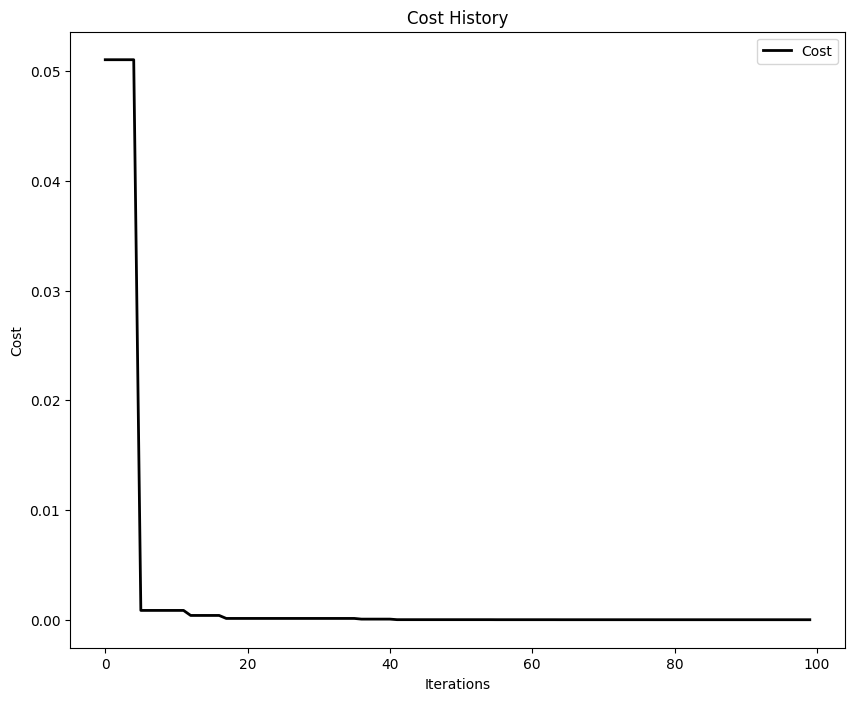

In [8]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

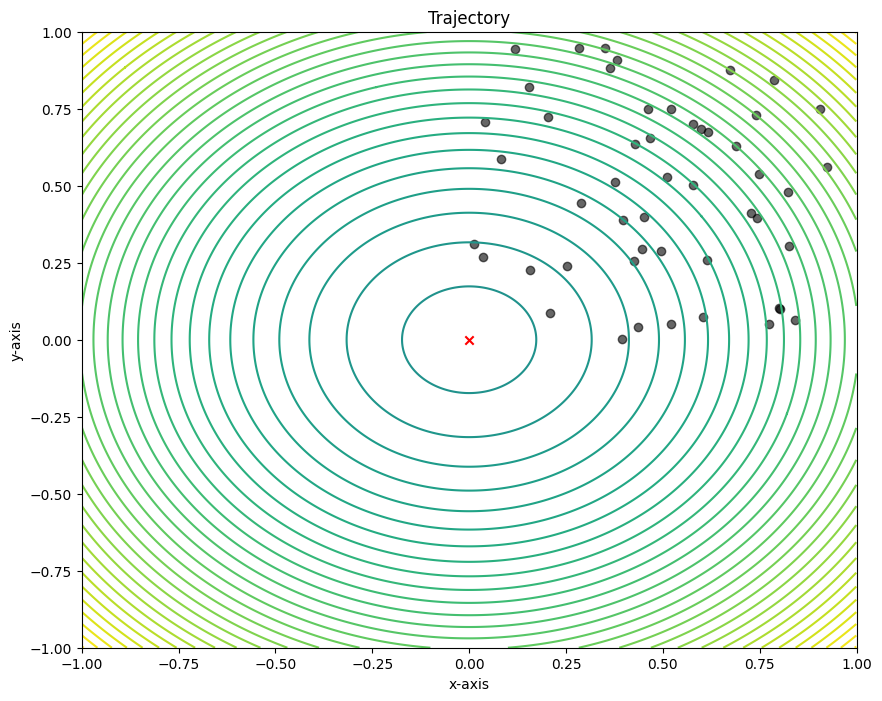

In [9]:
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))